# **Project Name - Exploratory Data Analysis on Titanic**

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Author**    - Allan Cheerakunnil Alex

# ***Let's Begin !***

### Import Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [72]:
train = pd.read_csv('/content/drive/MyDrive/Data Science/Personal Projects/Prodigy Tasks/Titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# **Exploratory Data Analysis**

## **Missing Data**

Using seaborn created a simple heatmap that allows us to know where are missing data

In [74]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

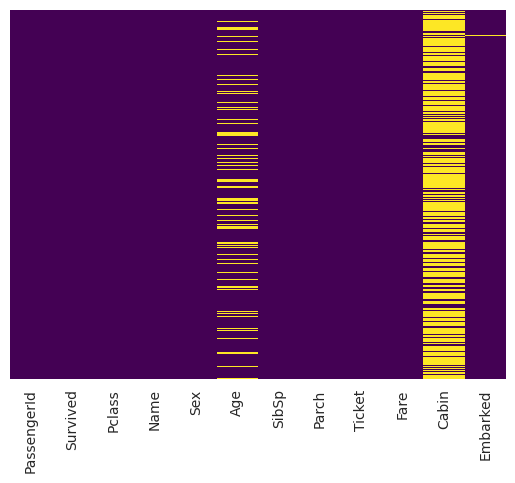

In [75]:
sns.heatmap(train.isnull(), yticklabels = False, cbar=False, cmap='viridis')

Here we can see that roughly 20 % of data is missing in Age columnn. Cabin column missing too much of data. We will probably drop Cabin column and replace Age column with some of imputation.

<ipython-input-76-fb1d11e56201>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




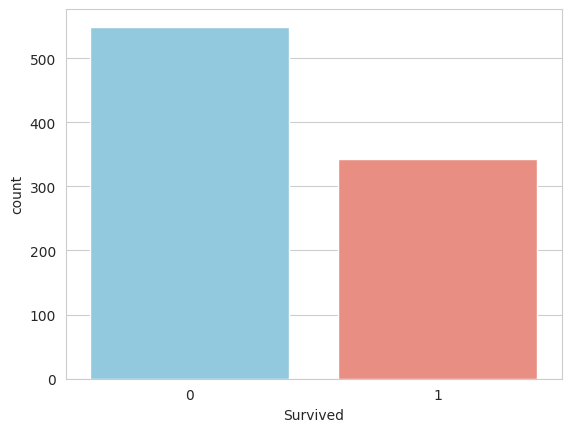

In [76]:
# Define the colors for the bars
colors = ["skyblue", "salmon"]

# Set the seaborn style
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette=colors)

# Show the plot
plt.show()


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Sex
male      577
female    314
Name: count, dtype: int64


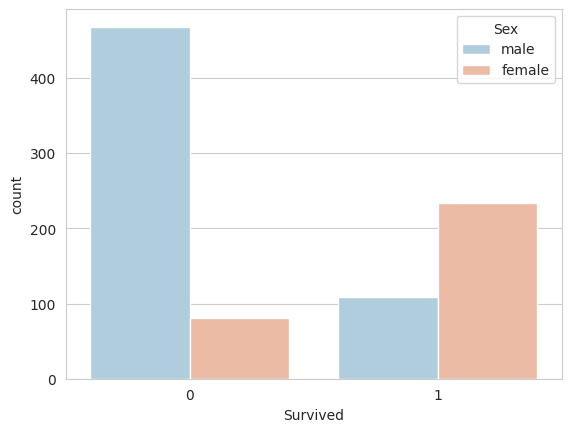

In [77]:
# Assuming 'train' is your DataFrame containing the 'Survived' and 'Sex' columns

# Check the column names and contents in the DataFrame
print(train.columns)
print(train['Sex'].value_counts())  # Check the values in the 'Sex' column

# Set the seaborn style
sns.set_style('whitegrid')

# Create the countplot with different colors for each bar using the 'RdBu_r' palette
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

# Show the plot
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

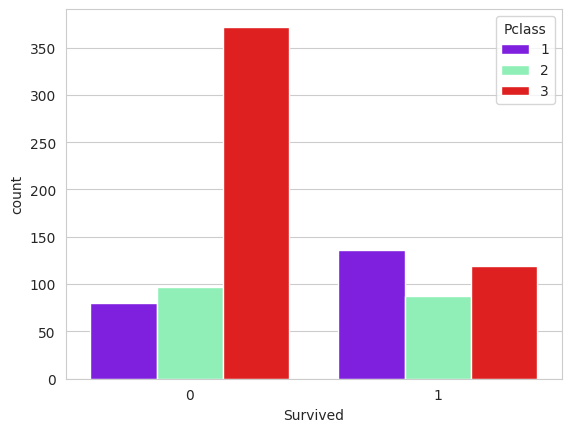

In [78]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<ipython-input-79-ac571356fd3a>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age'>

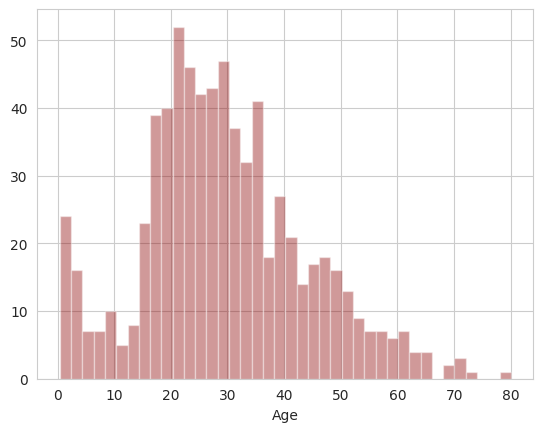

In [79]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: >

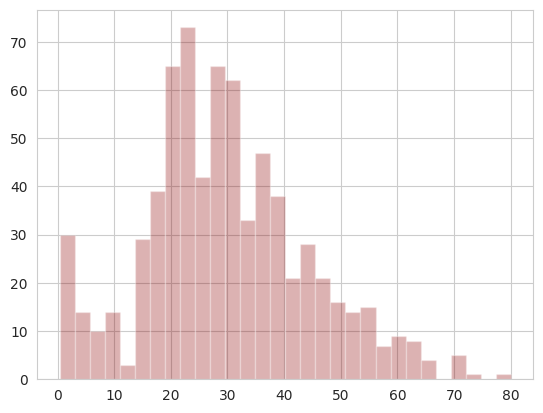

In [80]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

<ipython-input-81-c0d2fc5e9fa3>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-81-c0d2fc5e9fa3>:8: UserWarning:

The palette list has more values (8) than needed (7), which may not be intended.



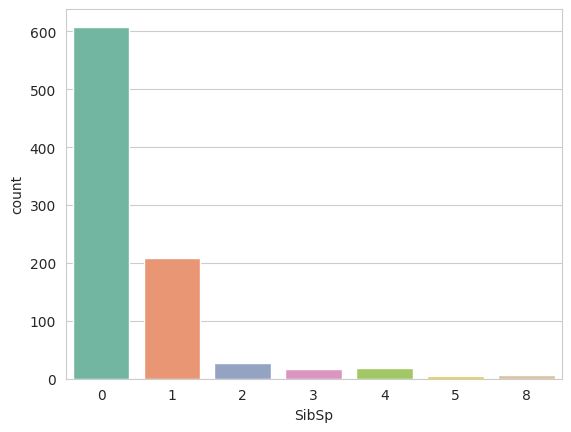

In [81]:
# Define a color palette
custom_palette = sns.color_palette("Set2")

# Set the seaborn style
sns.set_style('whitegrid')

# Create the countplot with different colors for each bar using the custom palette
sns.countplot(x='SibSp', data=train, palette=custom_palette)

# Show the plot
plt.show()

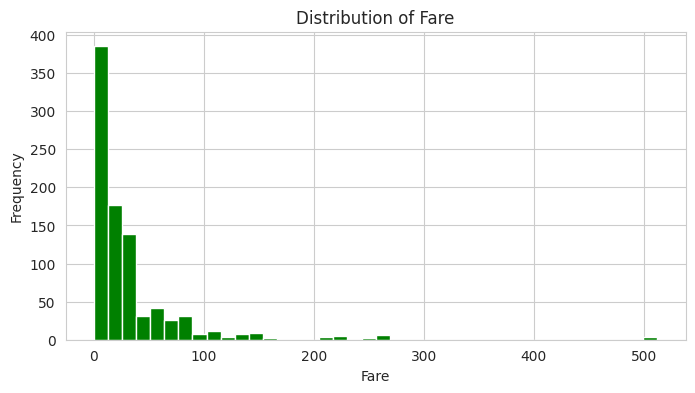

In [82]:
# Create the histogram with specified color, bins, and figsize
train['Fare'].hist(color='green', bins=40, figsize=(8, 4))

# Add labels and title
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare')

# Show the plot
plt.show()

# Cuffkinks for plots
Let's take a quick moment to show an example of cufflinks

In [83]:
import cufflinks as cf
cf.go_offline()
import plotly.express as px

# Assuming 'train' is your DataFrame containing the 'Fare' column

# Print a sample of the data to check its structure and values
print(train['Fare'].head())

# Create the histogram with specified bins and color using Plotly Express
fig = px.histogram(train, x='Fare', nbins=30, color_discrete_sequence=['green'])

# Update layout and show the plot
fig.update_layout(title='Distribution of Fare', xaxis_title='Fare', yaxis_title='Frequency')
fig.show()


0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64


#**Data Cleaning**

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers(Imputation). However we can be smarter about this and check the average age by passenger class. For example:

<ipython-input-84-d1a29430315f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

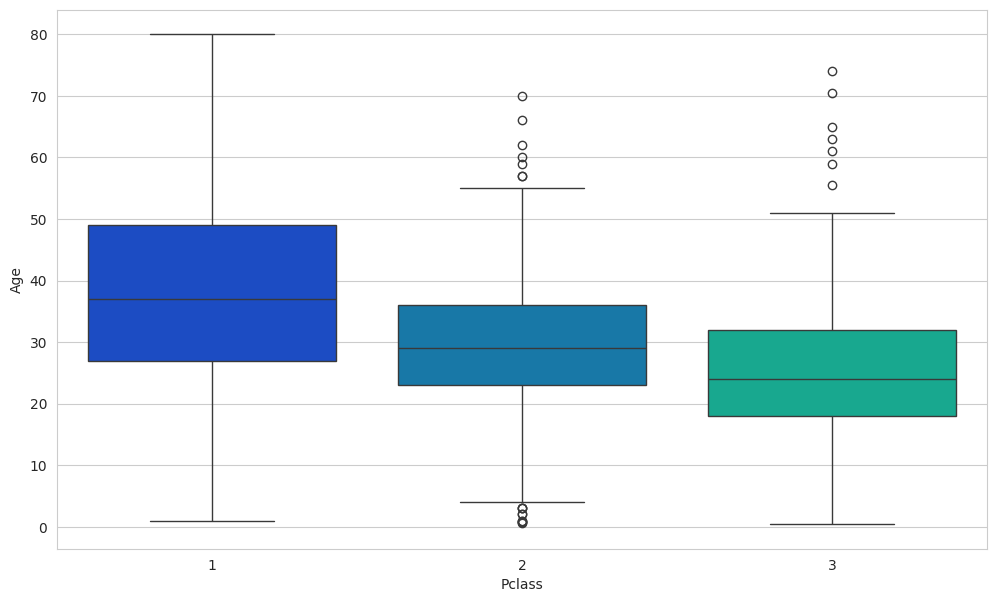

In [84]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train,palette='winter')

We can see wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [85]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return 37

    elif Pclass == 2:
      return 29

    else:
      return 24

  else:
    return Age

In [86]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

#**Lets Check Heat Map**

<Axes: >

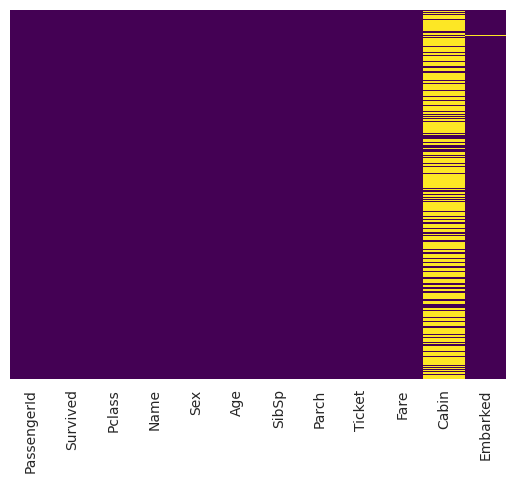

In [87]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Here we have replaced some values in Age column. Now, there are no missing values in Age Column.

After replacing value we can go ahead and drop the column of Cabin.

In [88]:
train.drop('Cabin', axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

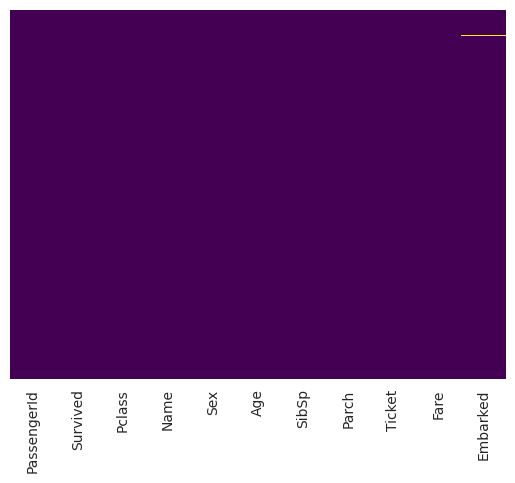

In [89]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Here we can see Embarked have 1 missing value. So we have filled the missing value of that column.

In [90]:
# Find the most frequent value (mode) in the 'Embarked' column
most_frequent_embarked = train['Embarked'].mode()[0]

# Fill the missing value in 'Embarked' column with the most frequent value
train['Embarked'].fillna(most_frequent_embarked, inplace=True)

<Axes: >

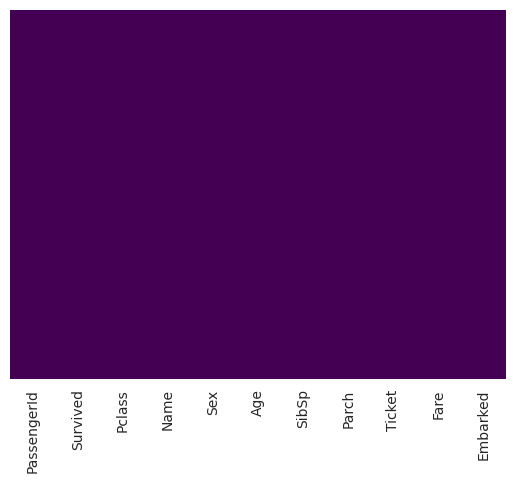

In [91]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [92]:
train.dropna(inplace=True)

# **Converting Categorical Features**

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [94]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [95]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [96]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [97]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [98]:
train=pd.concat([train, sex, embark], axis=1)

In [99]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


Our data is ready for model.

# **Building a Logistic Regression Model**

Lets start by splitting our data into a training set and test set

# **Train Test Split**

In [100]:
train.drop('Survived', axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [101]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_train = train_test_split(train.drop('Survived', axis=1), train ['Survived'], test_size = 0.30, random_state = 101)

# **Training and Predicting**

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [105]:
# Check the number of samples in X_train and y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (623, 9)
y_train shape: (268,)


In [106]:
 # Load your dataset into a DataFrame
train = pd.read_csv('/content/drive/MyDrive/Data Science/Personal Projects/Prodigy Tasks/Titanic/train.csv')

# Drop columns that are not needed for training (adjust as needed)
X = train.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train['Survived']

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines for numeric and categorical data
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Create a logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Fit the model to the training data
logreg.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_processed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8100558659217877
